In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
size = ctrl.Antecedent(np.arange(0, 4.5, 0.5), 'size')
juicy = ctrl.Antecedent(np.arange(0, 21, 1), 'juicy')
freshness = ctrl.Antecedent(np.arange(0, 21, 1), 'freshness')

quality = ctrl.Consequent(np.arange(0, 101, 1), 'quality')


In [3]:
size['low'] = fuzz.trapmf(size.universe, [0,0,2.5,3])
size['mid'] = fuzz.trimf(size.universe, [2.5, 3, 3.5])
size['high'] = fuzz.trapmf(size.universe, [3,3.5,5,5])


C:\Users\Naser\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


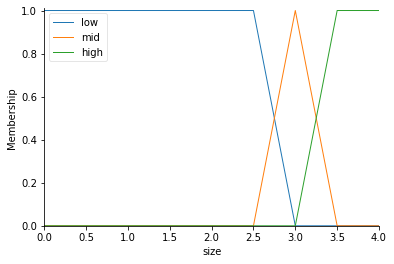

In [4]:
size.view()

In [5]:
freshness['low'] = fuzz.trapmf(freshness.universe, [0,0,5,9])
freshness['mid'] = fuzz.trapmf(freshness.universe, [5,10,14,15])
freshness['high'] = fuzz.trapmf(freshness.universe, [13,15,21,21])

C:\Users\Naser\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


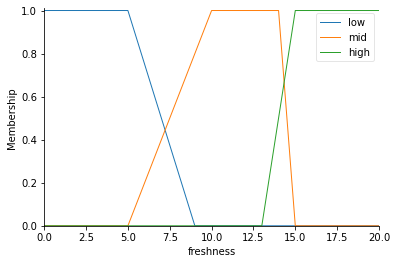

In [6]:
freshness.view()

In [7]:
juicy['low'] = fuzz.trapmf(juicy.universe, [0,0,5,9])
juicy['mid'] = fuzz.trapmf(juicy.universe, [5,10,14,15])
juicy['high'] = fuzz.trapmf(juicy.universe, [14,15,21,21])

C:\Users\Naser\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


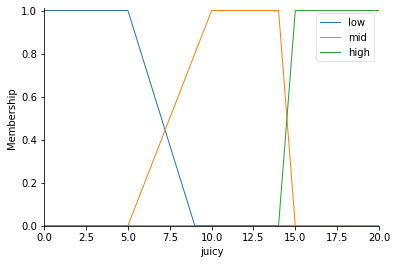

In [8]:
juicy.view()

In [9]:
quality['very poor'] = fuzz.trapmf(quality.universe, [0,0,20,30])
quality['poor'] = fuzz.trimf(quality.universe, [15, 30, 45])
quality['medium'] = fuzz.trapmf(quality.universe, [30,45,60,70])
quality['good'] = fuzz.trimf(quality.universe, [55, 70, 85])
quality['excellent'] = fuzz.trapmf(quality.universe, [70,85,101,101])




C:\Users\Naser\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


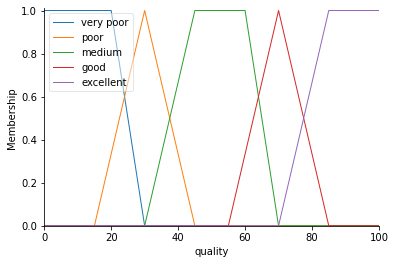

In [10]:
quality.view()

In [11]:
rules =[]


In [12]:
rules.append(ctrl.Rule(juicy['low'] & size['low'] & freshness['low'], quality['very poor']))
rules.append(ctrl.Rule(juicy['low'] & size['low'] & freshness['mid'], quality['very poor']))
rules.append(ctrl.Rule(juicy['low'] & size['low'] & freshness['high'], quality['poor']))

rules.append(ctrl.Rule(juicy['low'] & size['mid'] & freshness['low'], quality['poor']))
rules.append(ctrl.Rule(juicy['low'] & size['mid'] & freshness['mid'], quality['poor']))
rules.append(ctrl.Rule(juicy['low'] & size['mid'] & freshness['high'], quality['medium']))

rules.append(ctrl.Rule(juicy['low'] & size['high'] & freshness['low'], quality['medium']))
rules.append(ctrl.Rule(juicy['low'] & size['high'] & freshness['mid'], quality['medium']))
rules.append(ctrl.Rule(juicy['low'] & size['high'] & freshness['high'], quality['good']))

In [13]:
rules.append(ctrl.Rule(juicy['mid'] & size['low'] & freshness['low'], quality['poor']))
rules.append(ctrl.Rule(juicy['mid'] & size['low'] & freshness['mid'], quality['medium']))
rules.append(ctrl.Rule(juicy['mid'] & size['low'] & freshness['high'], quality['medium']))

rules.append(ctrl.Rule(juicy['mid'] & size['mid'] & freshness['low'], quality['poor']))
rules.append(ctrl.Rule(juicy['mid'] & size['mid'] & freshness['mid'], quality['good']))
rules.append(ctrl.Rule(juicy['mid'] & size['mid'] & freshness['high'], quality['good']))

rules.append(ctrl.Rule(juicy['mid'] & size['high'] & freshness['low'], quality['medium']))
rules.append(ctrl.Rule(juicy['mid'] & size['high'] & freshness['mid'], quality['good']))
rules.append(ctrl.Rule(juicy['mid'] & size['high'] & freshness['high'], quality['excellent']))

In [14]:
rules.append(ctrl.Rule(juicy['high'] & size['low'] & freshness['low'], quality['poor']))
rules.append(ctrl.Rule(juicy['high'] & size['low'] & freshness['mid'], quality['medium']))
rules.append(ctrl.Rule(juicy['high'] & size['low'] & freshness['high'], quality['medium']))

rules.append(ctrl.Rule(juicy['high'] & size['mid'] & freshness['low'], quality['medium']))
rules.append(ctrl.Rule(juicy['high'] & size['mid'] & freshness['mid'], quality['good']))
rules.append(ctrl.Rule(juicy['high'] & size['mid'] & freshness['high'], quality['excellent']))

rules.append(ctrl.Rule(juicy['high'] & size['high'] & freshness['low'], quality['medium']))
rules.append(ctrl.Rule(juicy['high'] & size['high'] & freshness['mid'], quality['excellent']))
rules.append(ctrl.Rule(juicy['high'] & size['high'] & freshness['high'], quality['excellent']))

In [15]:
date_grading_ctrl = ctrl.ControlSystem(rules)

In [16]:
len(rules)

27

In [17]:
date_grading= ctrl.ControlSystemSimulation(date_grading_ctrl)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x274e638fa90>)

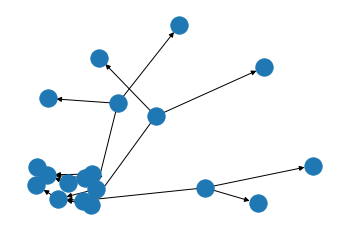

In [18]:
rules[0].view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x274e6454370>)

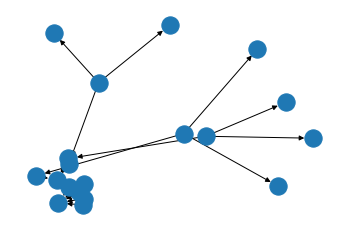

In [19]:
rules[9].view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x274e64c9b20>)

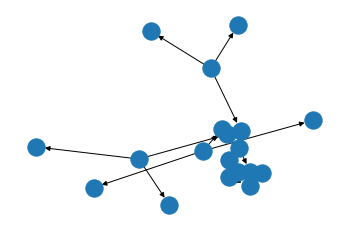

In [20]:
rules[21].view()

In [82]:
date_grading.input['size'] = 4
date_grading.input['freshness'] = 20
date_grading.input['juicy'] = 2

In [83]:
date_grading.compute()

In [84]:
date_grading.output['quality']

30.0

C:\Users\Naser\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


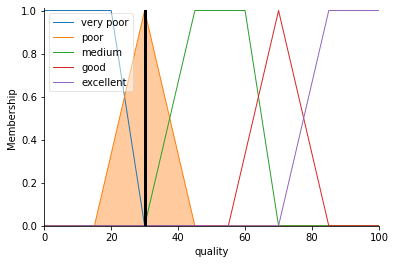

In [85]:
quality.view(sim=date_grading)